In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
output_dir = 'outputs_k80_ConvLSTM_00/'

In [3]:
training_outputs = os.listdir(output_dir)

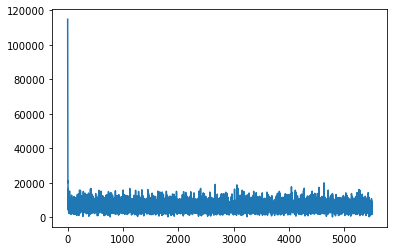

In [4]:
loss_list_index = training_outputs.index("loss_over_iterations.npy")
loss_list_array = np.load(output_dir + training_outputs[loss_list_index])
plt.plot(loss_list_array);

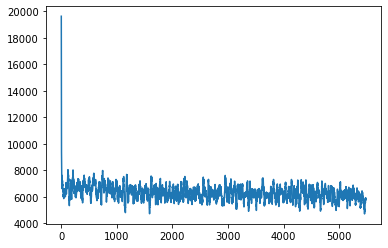

In [5]:
loss_RunAvg20_array = np.convolve(loss_list_array, np.ones(25)/25, mode = 'valid')
plt.plot(loss_RunAvg20_array);

In [6]:
train_y_hat = np.load(output_dir + 'train_prediction.npy')
train_y = np.load(output_dir + 'train_truth.npy')

In [7]:
train_y.shape

(5, 1, 5, 96, 96)

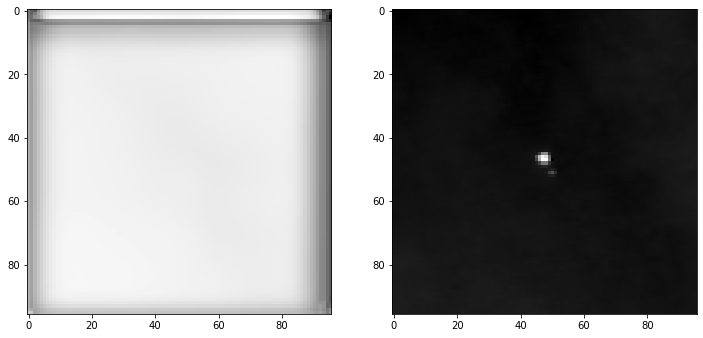

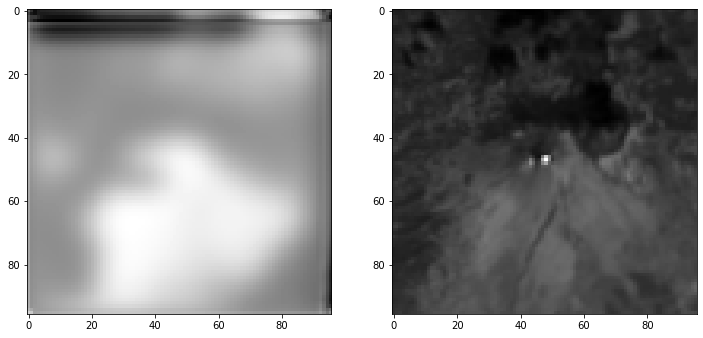

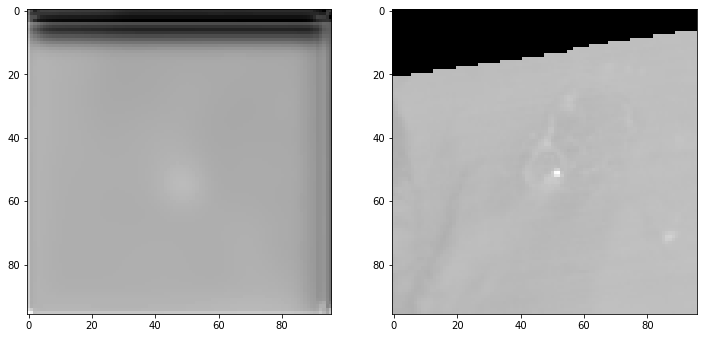

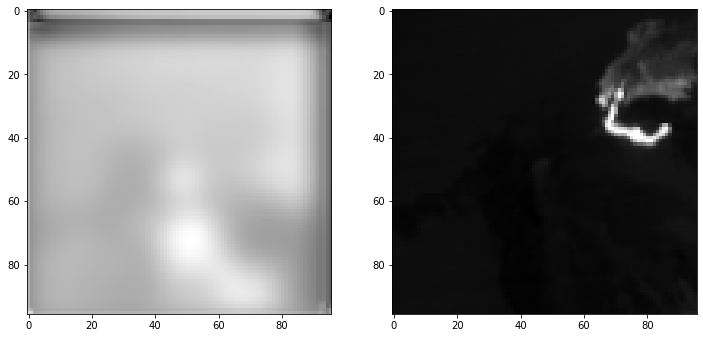

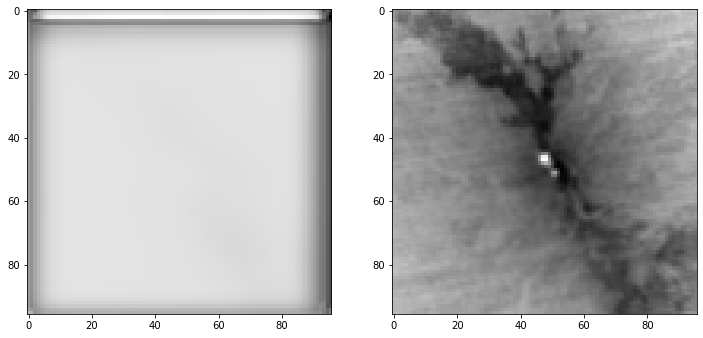

In [9]:
for i in range(train_y.shape[0]):    
    f, axarr = plt.subplots(1, 2)
    f.set_figheight(6)
    f.set_figwidth(12)
    axarr[0].imshow(train_y_hat[i, 0, 2, :, :], cmap = 'gist_gray')
    axarr[1].imshow(train_y[i, 0, 2, :, :], cmap = 'gist_gray')

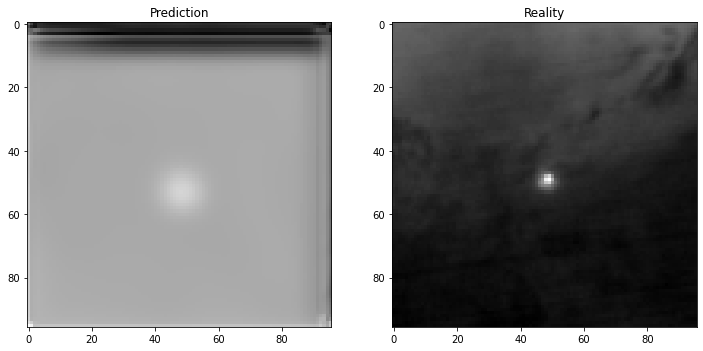

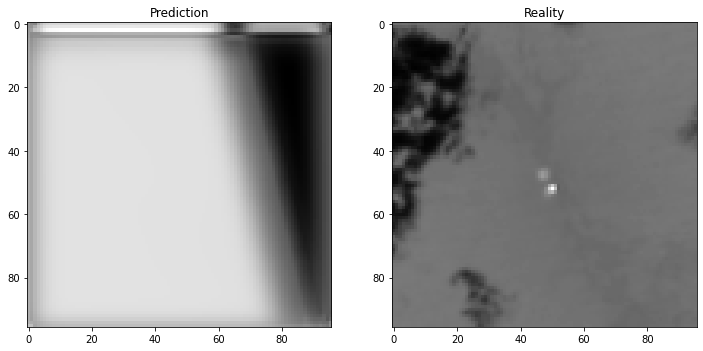

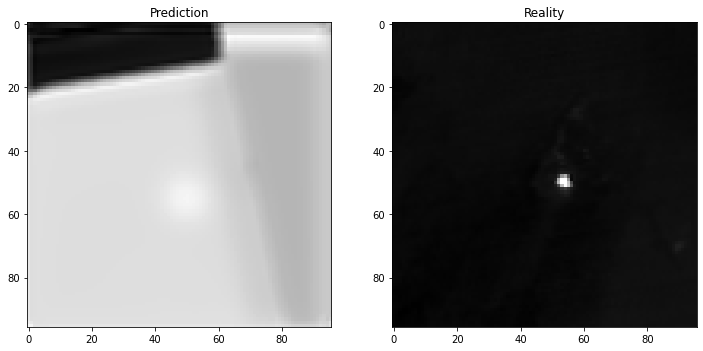

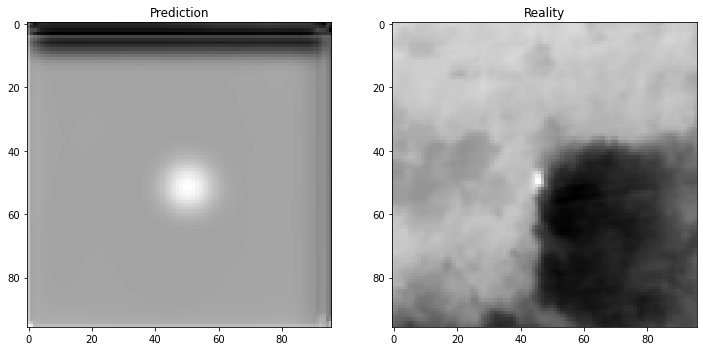

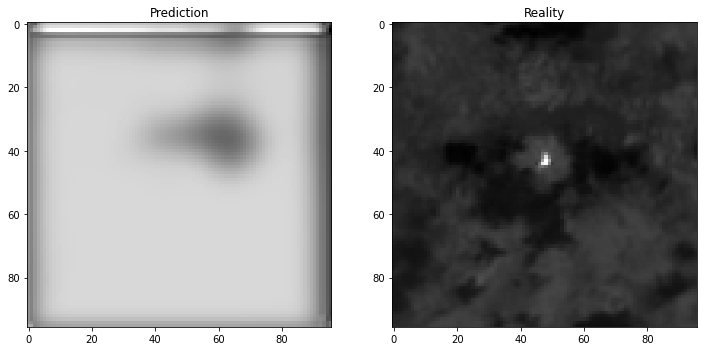

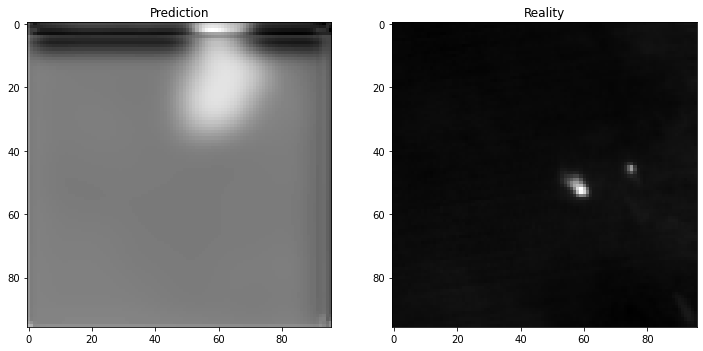

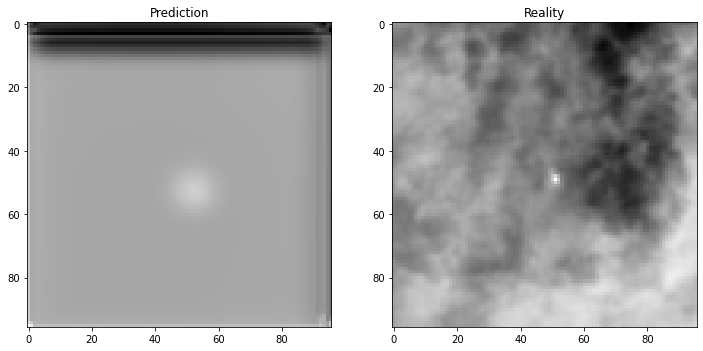

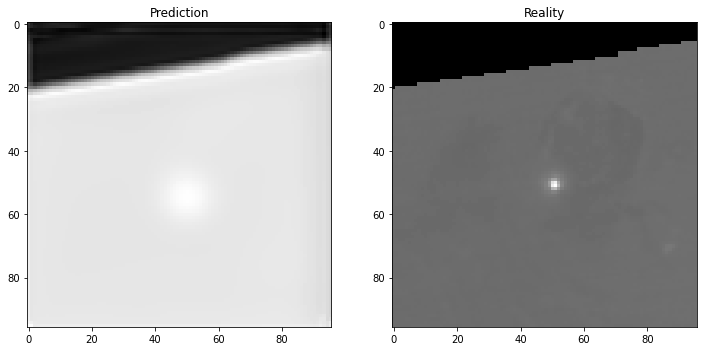

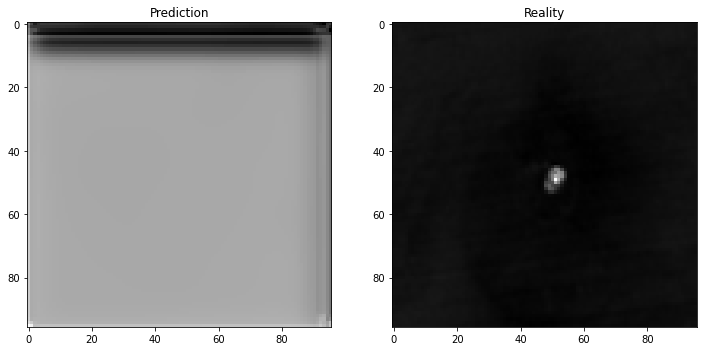

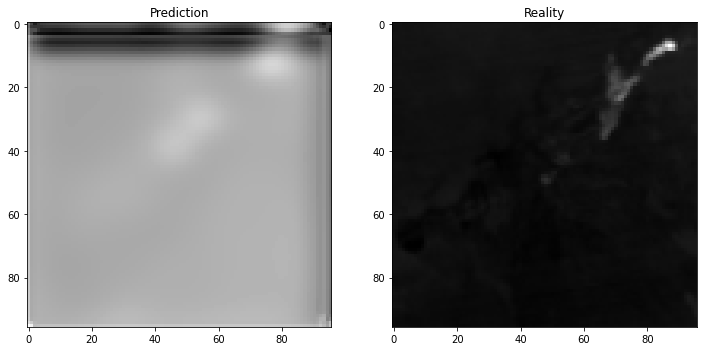

In [10]:
for i in range(10):
    
    f, axarr = plt.subplots(1, 2)
    f.set_figheight(6)
    f.set_figwidth(12)
    
    y_hat_fname = "valid_prediction_" + str(i) + ".npy"
    y_hat_file_index = training_outputs.index(y_hat_fname)
    y_hat_array = np.load(output_dir + training_outputs[y_hat_file_index])
    axarr[0].imshow(y_hat_array[0, 0, 2, :, :], cmap = 'gist_gray')
    axarr[0].set_title("Prediction");
    
    y_fname = "valid_truth_" + str(i) + ".npy"
    y_file_index = training_outputs.index(y_fname)
    y_array = np.load(output_dir + training_outputs[y_file_index])
    axarr[1].imshow(y_array[0, 0, 2, :, :], cmap = 'gist_gray')
    axarr[1].set_title("Reality");

In [11]:
validation_loss = np.load(output_dir + "final_valid_loss.npy")
sum(validation_loss)

0.13159921974875033